In [1]:
import hypergraphx
from hypergraphx.readwrite import read_hif

In [2]:
H = read_hif("data/publications.hif.json")
print(H)

No hypergraph type - assume undirected
Hypergraph with 1960 nodes and 514 edges.
Distribution of hyperedge sizes: {1: 32, 3: 95, 2: 70, 4: 95, 5: 79, 6: 65, 9: 11, 7: 42, 8: 19, 10: 2, 11: 2, 17: 1, 12: 1}


In [3]:
lg = H.subhypergraph_largest_component()
print(lg)

Hypergraph with 108 nodes and 30 edges.
Distribution of hyperedge sizes: {4: 9, 9: 1, 7: 3, 6: 8, 5: 5, 11: 1, 8: 2, 3: 1}


In [4]:

import hypergraphx
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.utils import normalize_array, calculate_permutation_matrix
from hypergraphx.communities.hy_sc.model import HySC
from hypergraphx.communities.hypergraph_mt.model import HypergraphMT
from hypergraphx.communities.hy_mmsbm.model import HyMMSBM
from hypergraphx.viz import draw_communities

max_iter = 200  # maximum number of EM iteration steps before aborting
check_convergence_every = 10 # number of steps in between every convergence check
normalizeU = False  # if True, then the membership matrix u is normalized such that every row sums to 1
baseline_r0 = False  # if True, then for the first iteration u is initialized around the solution of the Hypergraph Spectral Clustering
verbose = False  # flag to print details

In [5]:

K = 5  # number of communities
seed = 20  # random seed
n_realizations = 5  # number of realizations with different random initialization

model = HypergraphMT(
    n_realizations=n_realizations, 
    max_iter=max_iter, 
    check_convergence_every=check_convergence_every, 
    verbose=verbose
)
u_HypergraphMT, w_HypergraphMT, _ = model.fit(lg, 
                                               K=K, 
                                               seed=seed, 
                                               normalizeU=normalizeU, 
                                               baseline_r0=baseline_r0
                                              )


setting certain d in w to zero: [0 8]
setting certain d in w to zero: [0 8]
setting certain d in w to zero: [0 8]
setting certain d in w to zero: [0 8]
setting certain d in w to zero: [0 8]


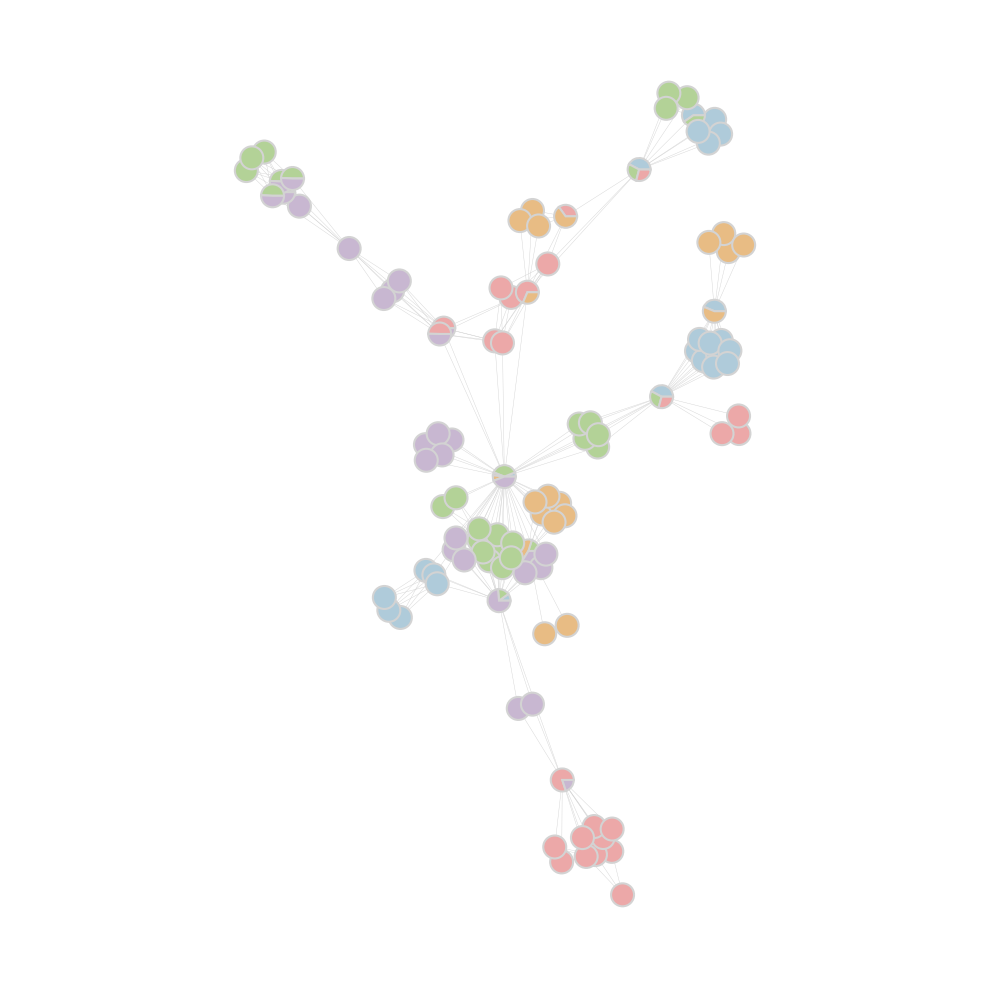

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cmap = sns.color_palette("Paired", desat=0.7)
col = {k: matplotlib.colors.to_hex(cmap[k*2], keep_alpha=False) for k in np.arange(K)}
fig, ax = plt.subplots(figsize=(10, 10))
draw_communities(hypergraph=lg, u=u_HypergraphMT, figsize=(10,10), col=col, ax=ax, with_node_labels=False, node_size=0.05)
plt.savefig("../figures/hgx_communities.pdf", dpi=300, bbox_inches='tight')

Computing observed motifs of order 3...


/usr/local/lib/python3.11/site-packages/hypergraphx/viz/draw_motifs.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hedge_pos, closed=True, fill=True, alpha=0.3, color=color, edgecolor=edge_color)


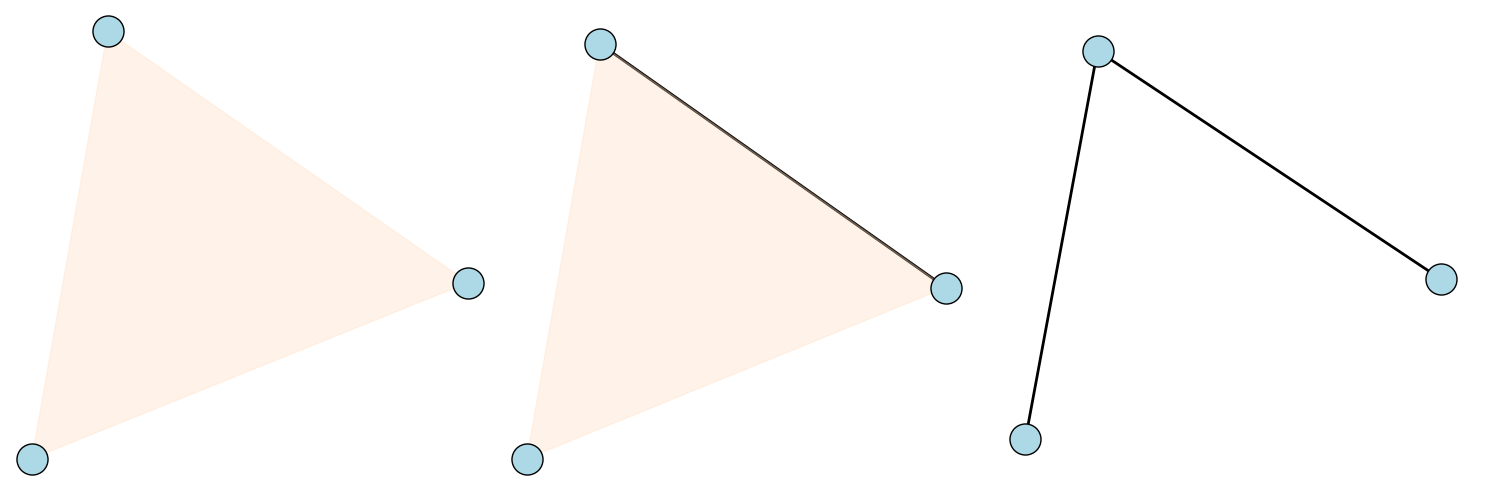

In [7]:
from hypergraphx.motifs import compute_motifs
from hypergraphx.viz.draw_motifs import draw_motifs

m = compute_motifs(H, order=3, runs_config_model=0)

hypergraphs = []
for motif in m['observed']:
    if motif[1] > 0 or motif[1] < 0:
        hypergraphs.append(motif)
# sort in descending order
hypergraphs.sort(key=lambda x: x[1], reverse=True)
hypergraphs = [h[0] for h in hypergraphs[:3]]
draw_motifs(hypergraphs, save_path="../figures/hgx_motifs3.pdf")

Computing observed motifs of order 4...


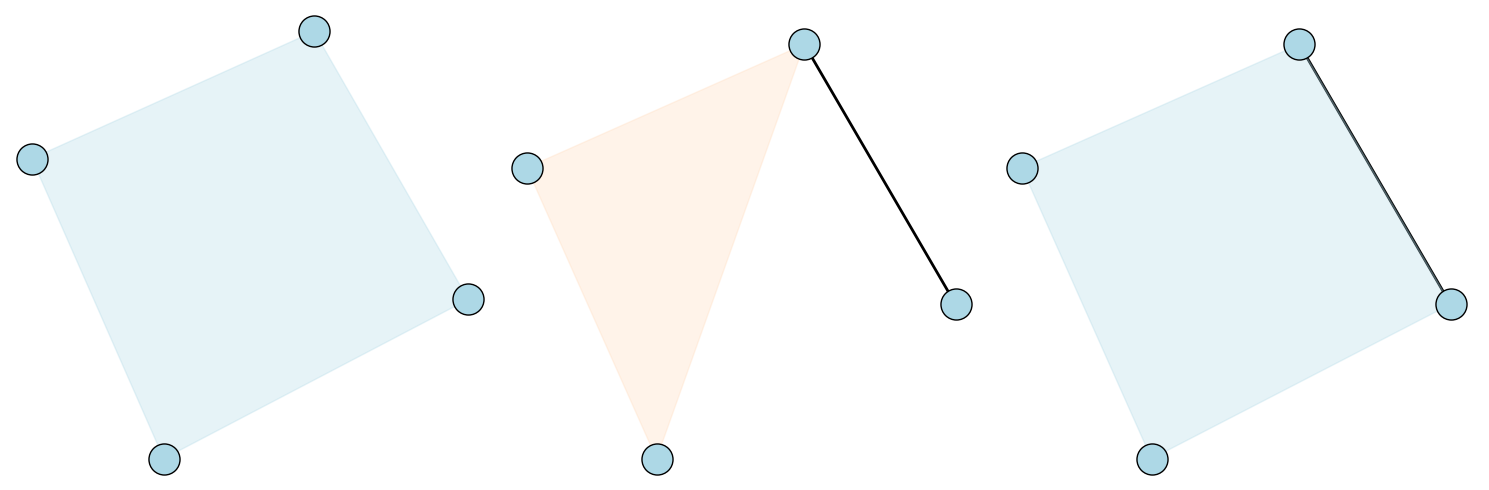

In [8]:
m = compute_motifs(H, order=4, runs_config_model=0)

hypergraphs = []
for motif in m['observed']:
    if motif[1] > 0 or motif[1] < 0:
        hypergraphs.append(motif)
# sort in descending order
hypergraphs.sort(key=lambda x: x[1], reverse=True)
hypergraphs = [h[0] for h in hypergraphs[:3]]
draw_motifs(hypergraphs, save_path="../figures/hgx_motifs4.pdf")